In [36]:
import numpy as np
import laser_hockey_env as lh
import gym
import DuelingDQAgent
from importlib import reload
import torch
import pylab as plt
import random
# %matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
reload(DuelingDQAgent)
reload(lh)

Cannot re-register id: LaserHockey-v0


<module 'laser_hockey_env' from '/Users/samski/Downloads/Gym-RL-DQN-solution/laser_hockey_env.py'>

In [37]:
np.set_printoptions(suppress=True)

In [50]:
env = lh.LaserHockeyEnv(mode=lh.LaserHockeyEnv.TRAIN_SHOOTING)

In [51]:
import random
load=False
if load:
    Q = torch.load('modelQ.pt')
    Q_next = torch.load('modelQNext.pt')
else:
    Q = None
    Q_next = None
player1 = DuelingDQAgent.DQNAgent(env, Q, Q_next)
#player2 = lh.BasicOpponent()

In [53]:
stats = []
losses = []
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [55]:
max_episodes=600
max_steps=500 
fps=50
#mode="random"
show=False
for i in range(max_episodes):
    # print("Starting a new episode")    
    total_reward = 0
    obs = env.reset()
#     obs_agent2 = env.obs_agent_two()
    for t in range(max_steps):
        env.render()
        done = False
        curr_act = player1.act(obs)
        a1 = env.discrete_to_continous_action(curr_act)
        #print(curr_act)
        a2 = [0,0.,0]
        pobs = obs
        obs, r, d, info = env.step(np.hstack([a1,a2]))
        total_reward += r
        transition = (pobs, curr_act, r, obs, d)
        player1.store_transition(transition)            
        if done: break    
    losses.extend(player1.train())
    stats.append([i,total_reward])  
#     stats.append([i,total_reward,t+1])
    #print(total_reward)
    #env.close()
#     if episode%30 == 20 and save:
#         torch.save(player1.actor, 'modelB5a.pt')
#         torch.save(player1.actor, 'modelB5a.pt')
    
    if ((i-1)%20==0):
        #print(info)
        print("{}: Done after {} steps. Reward: {}".format(i, t+1, total_reward))
stats_np = np.asarray(stats)
fig=plt.figure(figsize=(6,3.8))
plt.plot(stats_np[:,1], label="reward")
plt.plot(running_mean(stats_np[:,1],20), label="smoothed reward")
plt.legend()
fig.savefig("DDQN_Shooting_Graph_throwout.pdf") 

env.close()

1: Done after 500 steps. Reward: 0
Player 1 scored
21: Done after 500 steps. Reward: 0
41: Done after 500 steps. Reward: 0
61: Done after 500 steps. Reward: 0
81: Done after 500 steps. Reward: 0
Player 1 scored
Player 1 scored


KeyboardInterrupt: 

In [21]:
#         torch.save(player1.Q, 'modelQ.pt')
#         torch.save(player1.Q_next, 'modelQNext.pt')

In [22]:
env = lh.LaserHockeyEnv(mode=lh.LaserHockeyEnv.TRAIN_DEFENSE)
load=False
if load:
    Q = torch.load('modelQ.pt')
    Q_next = torch.load('modelQNext.pt')
else:
    Q = None
    Q_next = None
player1 = DuelingDQAgent.DQNAgent(env, Q, Q_next)

In [23]:
stats = []
losses = []
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

Player 1 scored
Player 2 scored
1: Done after 500 steps. Reward: -3600
Player 2 scored
Player 1 scored
Player 2 scored
Player 2 scored
Player 1 scored
Player 2 scored
Player 2 scored
Player 1 scored
Player 2 scored
Player 2 scored
Player 1 scored
Player 1 scored
Player 2 scored
Player 1 scored
Player 2 scored
21: Done after 500 steps. Reward: -4580
Player 1 scored
Player 2 scored
Player 2 scored
Player 1 scored
Player 2 scored
Player 1 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 1 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 1 scored
Player 1 scored
41: Done after 500 steps. Reward: 3980
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 1 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 1 scored
Player 2 scored
Player 2 scored
Player 1 scored
Player 1 scored
61: Done after 500 steps. Reward: 3790
Player 2 scored
Player 1 scored
Player 2 sc

Player 2 scored
Player 2 scored
Player 2 scored
Player 1 scored
Player 2 scored
Player 1 scored
Player 2 scored
Player 2 scored
Player 1 scored
561: Done after 500 steps. Reward: 4020
Player 2 scored
Player 1 scored
Player 2 scored
Player 1 scored
Player 1 scored
Player 1 scored
Player 2 scored
Player 2 scored
Player 1 scored
Player 1 scored
Player 1 scored
Player 2 scored
Player 1 scored
Player 2 scored
Player 2 scored
Player 2 scored
581: Done after 500 steps. Reward: -4570
Player 2 scored
Player 2 scored
Player 2 scored
Player 1 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 1 scored
Player 2 scored
Player 2 scored
Player 1 scored


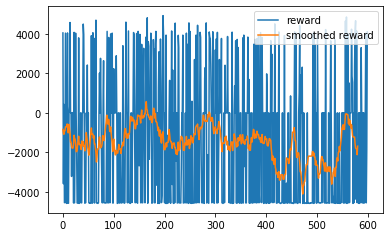

In [24]:
max_episodes=600
max_steps=500 
fps=50
#mode="random"
show=False
for i in range(max_episodes):
    # print("Starting a new episode")    
    total_reward = 0
    obs = env.reset()
#     obs_agent2 = env.obs_agent_two()
    for t in range(max_steps):
        #env.render()
        done = False
        curr_act = player1.act(obs)
        a1 = env.discrete_to_continous_action(curr_act)
        #print(curr_act)
        a2 = [0,0.,0]
        pobs = obs
        obs, r, d, info = env.step(np.hstack([a1,a2]))
        total_reward += r
        transition = (pobs, curr_act, r, obs, d)
        player1.store_transition(transition)            
        if done: break    
    losses.extend(player1.train())
    stats.append([i,total_reward])  
#     stats.append([i,total_reward,t+1])
    #print(total_reward)
    #env.close()
#     if episode%30 == 20 and save:
#         torch.save(player1.actor, 'modelB5a.pt')
#         torch.save(player1.actor, 'modelB5a.pt')
    
    if ((i-1)%20==0):
        #print(info)
        print("{}: Done after {} steps. Reward: {}".format(i, t+1, total_reward))
stats_np = np.asarray(stats)
fig=plt.figure(figsize=(6,3.8))
plt.plot(stats_np[:,1], label="reward")
plt.plot(running_mean(stats_np[:,1],20), label="smoothed reward")
plt.legend()
fig.savefig("DDQN_Defense_Graph_throwout.pdf")    

In [25]:
#         torch.save(player1.Q, 'modelQShootDef.pt')
#         torch.save(player1.Q_next, 'modelQNextShootDef.pt')

In [26]:
reload(lh)
env = lh.LaserHockeyEnv()
o = env.reset()

load=False
if load:
    Q = torch.load('modelQShootDef.pt')
    Q_next = torch.load('modelQNextShootDef.pt')
else:
    Q = None
    Q_next = None
player1 = DuelingDQAgent.DQNAgent(env, Q, Q_next)

Cannot re-register id: LaserHockey-v0


In [30]:
player2 = lh.BasicOpponent()

for i in range(max_episodes):
    # print("Starting a new episode")    
    obs = env.reset()
    obs_agent2 = env.obs_agent_two()
    for t in range(max_steps):
        env.render()
        curr_act = player1.act(obs)
        a1 = env.discrete_to_continous_action(curr_act)
        a2 = player2.act(obs_agent2)
        obs, r, d, info = env.step(np.hstack([a1,a2]))

        obs_buffer.append(obs)
        obs_agent2 = env.obs_agent_two()
        if d: break
env.close()

Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 1 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 1 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 1 scored
Player 2 scored
Player 1 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 2 scored
Player 1 scored
Player 2 scored
Player 2 scored
Player 1 scored
Player 2 scored
Player 1 scored
Player 2 scored
Player 1 scored
Player 1 scored
Player 2 scored
Player 2 scored
Player 1 scored
Player 2 scored
Player 2

KeyboardInterrupt: 

# Hand-crafted Opponent

In [3]:
reload(lh)

Cannot re-register id: LaserHockey-v0


<module 'laser_hockey_env' from '/Users/samski/Downloads/Gym-RL-DQN-solution/laser_hockey_env.py'>

In [4]:
env = lh.LaserHockeyEnv()

In [5]:
o = env.reset()
#env.render()

In [6]:
player1 = lh.BasicOpponent()
player2 = lh.BasicOpponent()

In [7]:
obs_buffer = []

In [8]:
obs = env.reset()
obs_agent2 = env.obs_agent_two()
for _ in range(300):
    #env.render()
    a1 = player1.act(obs)
    a2 = player2.act(obs_agent2)
    obs, r, d, info = env.step(np.hstack([a1,a2]))
    
    obs_buffer.append(obs)
    obs_agent2 = env.obs_agent_two()
    if d: break

Player 1 scored


In [ ]:
obs_buffer = np.asarray(obs_buffer)

In [ ]:
np.mean(obs_buffer,axis=0)

In [ ]:
np.std(obs_buffer,axis=0)

In [ ]:
scaling = [ 1.0,  1.0 , 3.14, 4.0, 4.0, 2.0,  
            1.0,  1.0,  3.14, 4.0, 4.0, 2.0,  
            2.0, 2.0, 10.0, 10.0]

In [ ]:
env.close()

# Human Opponent

In [ ]:
import time

In [ ]:
env = lh.LaserHockeyEnv()

In [ ]:
o = env.reset()
env.render()

In [ ]:
player1 = lh.HumanOpponent(env=env, player=1)
player2 = lh.BasicOpponent()

In [ ]:
obs = env.reset()
time.sleep(1)
obs_agent2 = env.obs_agent_two()
for _ in range(1600):
    env.render()
    a1 = player1.act(obs)
    a2 = player2.act(obs_agent2)
    obs, r, d, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break